In [36]:
from IPython.display import display, Image
from prov.model import ProvDocument
from prov.dot import prov_to_dot
from shortid import ShortId

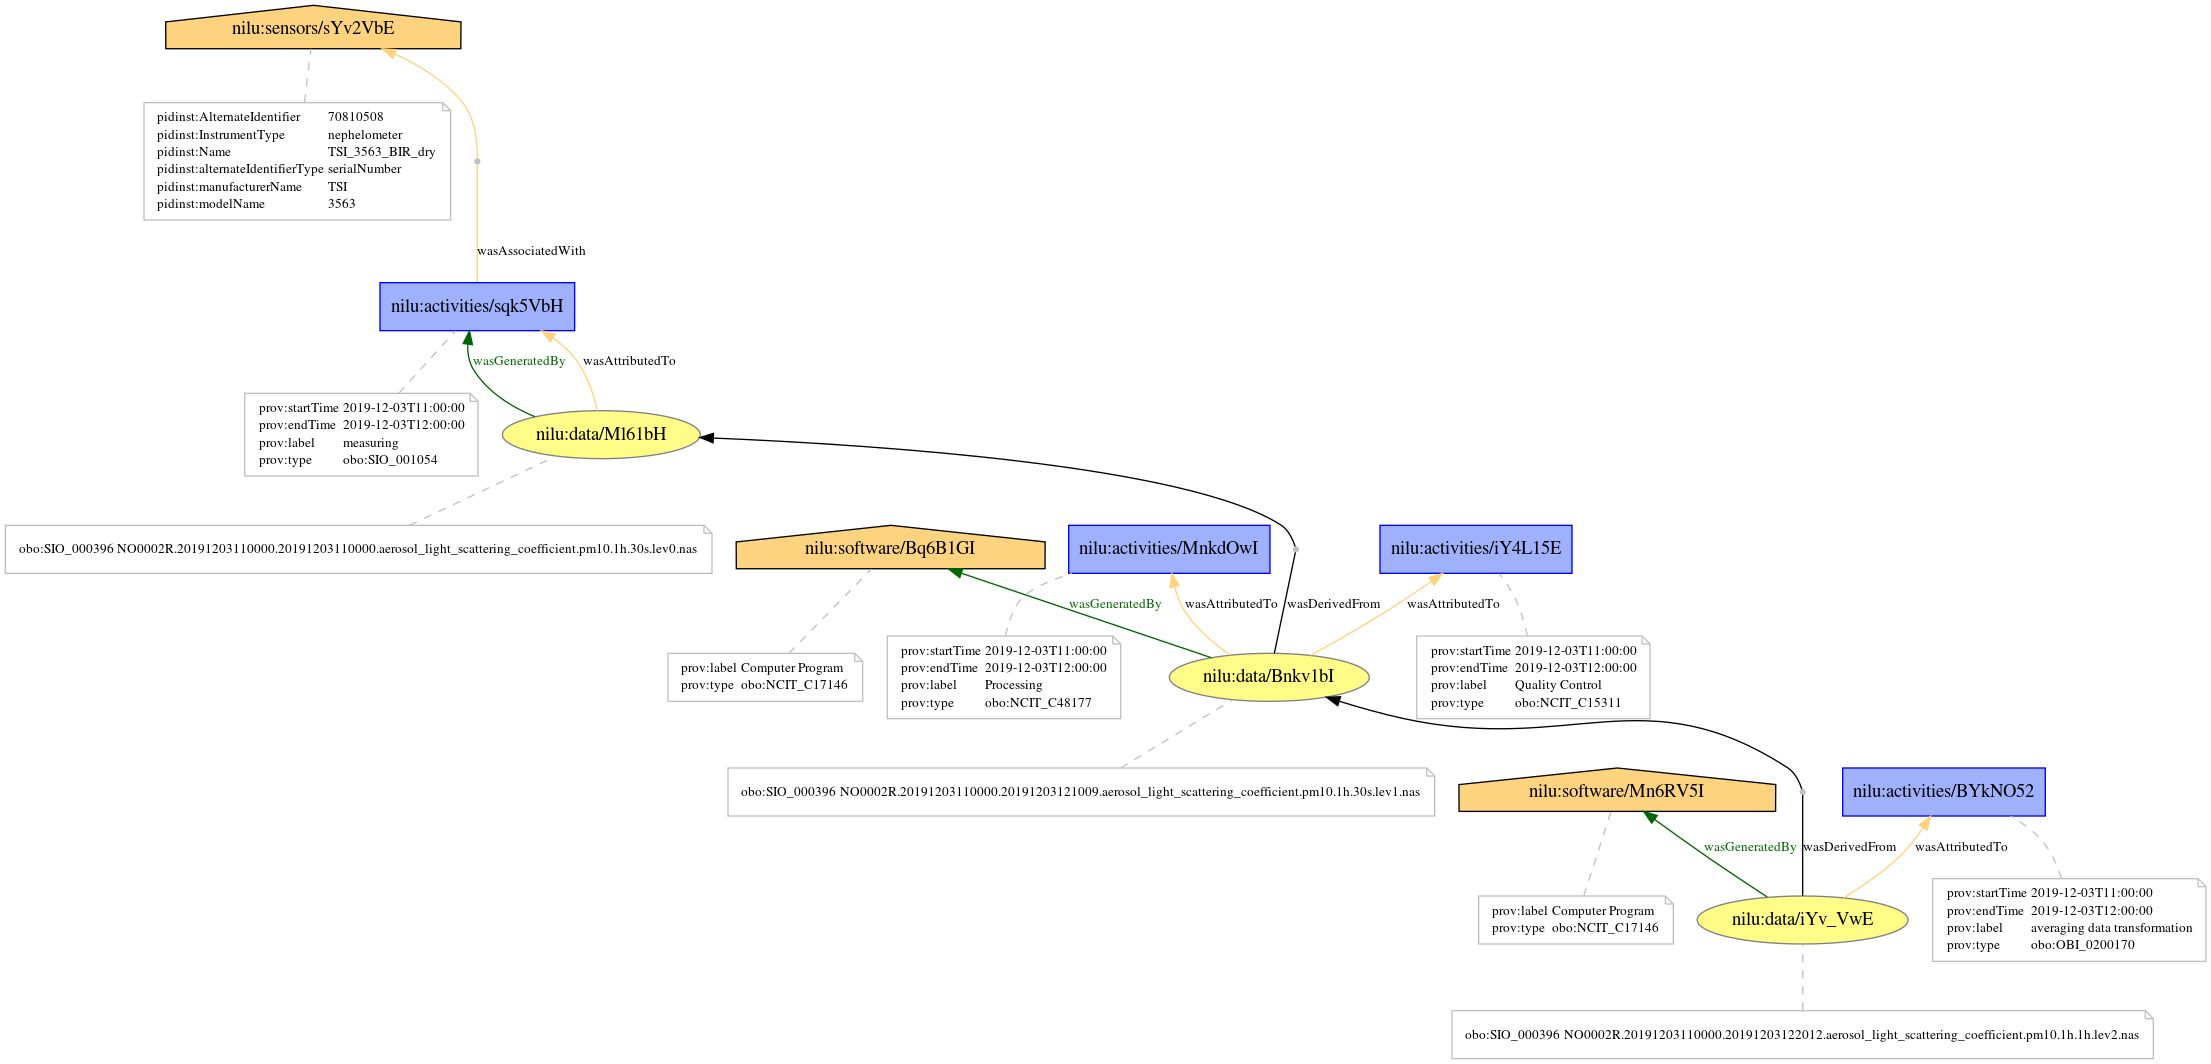

In [19]:
# Workflow description https://camo.githubusercontent.com/f1594ef10cf861aa559dcd116dcd361ec1f1a2df/68747470733a2f2f666f6c6b2e6e696c752e6e6f2f7e6d61726b75732f4143545249532d444d502f32303139303432342532304143545249532532304542415325323044617461253230466c6f7763686172742e706e67

vocab = {
    'obo:SIO_001054': 'measuring',
    'obo:SIO_000396': 'file',
    'obo:NCIT_C15311': 'Quality Control',
    'obo:NCIT_C48177': 'Processing',
    'obo:NCIT_C17146': 'Computer Program',
    'obo:OBI_0200170': 'averaging data transformation'
}

sid = ShortId()
prov = ProvDocument()

prov.add_namespace('obo', 'http://purl.obolibrary.org/obo/')
prov.add_namespace('nilu', 'http://nilu.no/')
prov.add_namespace('pidinst', 'http://pidinst.org/')

et1 = prov.entity('nilu:data/{}'.format(sid.generate()), other_attributes={'obo:SIO_000396': 'NO0002R.20191203110000.20191203110000.aerosol_light_scattering_coefficient.pm10.1h.30s.lev0.nas'})
et2 = prov.entity('nilu:data/{}'.format(sid.generate()), other_attributes={'obo:SIO_000396': 'NO0002R.20191203110000.20191203121009.aerosol_light_scattering_coefficient.pm10.1h.30s.lev1.nas'})
et3 = prov.entity('nilu:data/{}'.format(sid.generate()), other_attributes={'obo:SIO_000396': 'NO0002R.20191203110000.20191203122012.aerosol_light_scattering_coefficient.pm10.1h.1h.lev2.nas'})

ag1 = prov.agent('nilu:sensors/{}'.format(sid.generate()), other_attributes={'pidinst:InstrumentType': 'nephelometer',
                                                                             'pidinst:manufacturerName': 'TSI',
                                                                             'pidinst:modelName': '3563',
                                                                             'pidinst:Name': 'TSI_3563_BIR_dry',
                                                                             'pidinst:AlternateIdentifier': '70810508',
                                                                             'pidinst:alternateIdentifierType': 'serialNumber'})
ag2 = prov.agent('nilu:software/{}'.format(sid.generate()), other_attributes={'prov:label': vocab['obo:NCIT_C17146'],
                                                                              'prov:type': 'obo:NCIT_C17146'})
ag3 = prov.agent('nilu:software/{}'.format(sid.generate()), other_attributes={'prov:label': vocab['obo:NCIT_C17146'],
                                                                              'prov:type': 'obo:NCIT_C17146'})

ac1 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T11:00:00', '2019-12-03T12:00:00', other_attributes={'prov:label': vocab['obo:SIO_001054'], 
                                                                                                                                 'prov:type': 'obo:SIO_001054'})
ac2 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T11:00:00', '2019-12-03T12:00:00', other_attributes={'prov:label': vocab['obo:NCIT_C15311'], 
                                                                                                                                 'prov:type': 'obo:NCIT_C15311'})
ac3 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T11:00:00', '2019-12-03T12:00:00', other_attributes={'prov:label': vocab['obo:NCIT_C48177'], 
                                                                                                                                 'prov:type': 'obo:NCIT_C48177'})
ac4 = prov.activity('nilu:activities/{}'.format(sid.generate()), '2019-12-03T11:00:00', '2019-12-03T12:00:00', other_attributes={'prov:label': vocab['obo:OBI_0200170'], 
                                                                                                                                 'prov:type': 'obo:OBI_0200170'})
    
prov.wasAttributedTo(et1, ac1)
prov.wasGeneratedBy(et1, ac1)
prov.wasAssociatedWith(ac1, ag1)

prov.wasDerivedFrom(et2, et1)
prov.wasGeneratedBy(et2, ag2)
prov.wasAttributedTo(et2, ac2)
prov.wasAttributedTo(et2, ac3)

prov.wasDerivedFrom(et3, et2)
prov.wasGeneratedBy(et3, ag3)
prov.wasAttributedTo(et3, ac4)

prov.serialize('prov-data.ttl', format='rdf', rdf_format='ttl')

dot = prov_to_dot(prov)
display(Image(dot.create_png()))